In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
df2 = pd.read_csv('Assignment 1 - survey data.csv')
df2.head()# showing the head of the survey data



,id,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


In [2]:
df1 = pd.read_csv('Assignment 1 - steps data.csv', sep=";")
df1.head()#showing the head of the steps data

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merge datasets on 'Id'

df2['mean_steps'] = 0  # made a new collum #Change into nan if possible 
for r in range(929):
    mean = np.array(list(df1.iloc[r, 10:]))
    mean = np.nanmean(mean)
    if (str(mean) != 'nan'):
        df2.iloc[r,10]=mean # added the mean_steps of every person to the collum 
df2

In [4]:
df2.mean(axis = 1).dropna()

0      1180.651961
1       626.179012
2       881.425084
3      1124.173028
4       975.169082
          ...     
924    1861.174242
925    1081.387500
926    1688.651452
927    1112.763693
928    2197.412209
Length: 929, dtype: float64

In [5]:
df2["average_steps_mean"] = df2.mean(axis = 1) 
df2.head(5)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,mean_steps,average_steps_mean
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,6757.911765,1180.651961
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,3455.074074,626.179012
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,4986.550505,881.425084
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,6376.038168,1124.173028
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,5516.014493,975.169082


Extra column with average of the mean steps.

In [37]:
df_sel = df2[['average_steps_mean','height','waist']] 
df_sel.head()


,average_steps_mean,height,waist
0,1180.651961,183.0,78.0
1,626.179012,163.0,75.0
2,881.425084,172.0,60.0
3,1124.173028,182.0,95.0
4,975.169082,177.0,81.0


Create a subset with the right variables. 

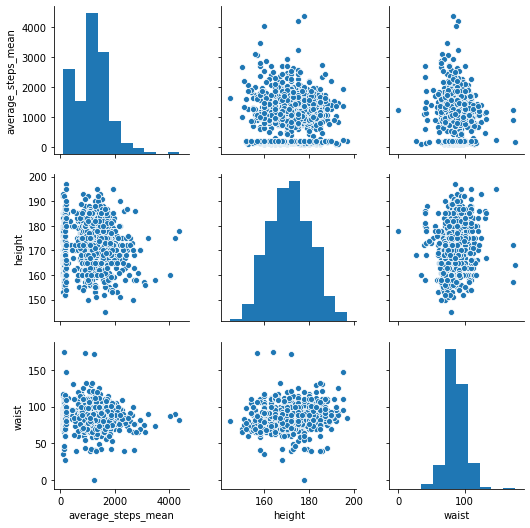

In [38]:
sns.pairplot(df_sel.dropna())
plt.show()

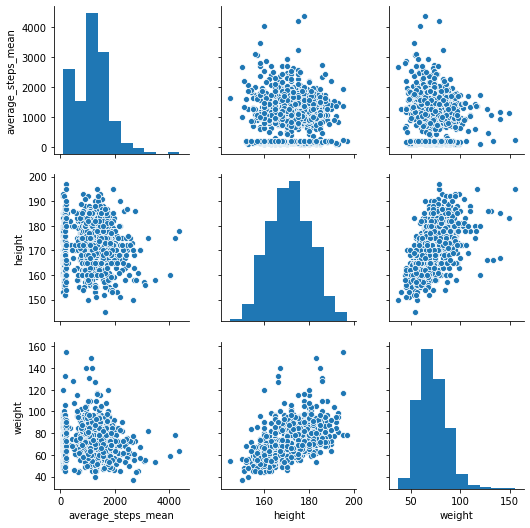

In [7]:
df2 = df2[(df2['average_steps_mean'] > 100)& (df2['height'] > 10) & (df2['weight'] > 0)] #remove wrong data
df_sel = df2[['average_steps_mean','height','weight']]
sns.pairplot(df_sel.dropna())
plt.show()

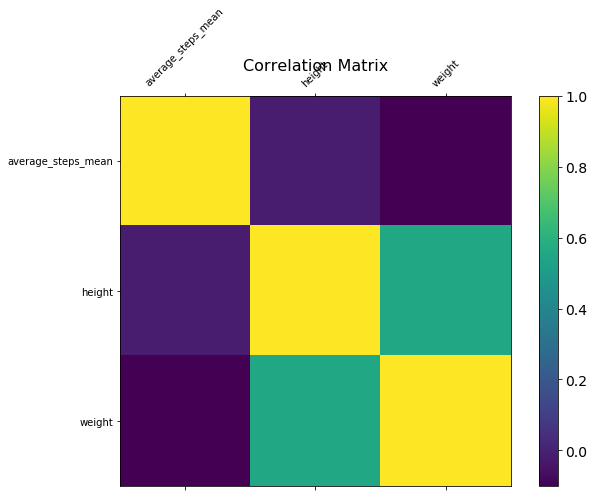

In [16]:
f = plt.figure(figsize=(10, 7))
plt.matshow(df_sel.corr(), fignum=f.number)
plt.xticks(range(df_sel.shape[1]), df_sel.columns, fontsize=10, rotation=45)
plt.yticks(range(df_sel.shape[1]), df_sel.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Height and Weight correlate alot. 

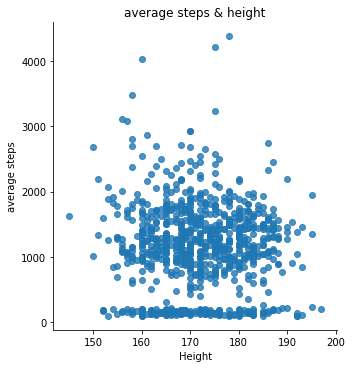

In [13]:
sns.lmplot(x='height', y='average_steps_mean', fit_reg=False, data=df_sel) 
plt.xlabel('Height') 
plt.ylabel('average steps')
plt.title('average steps & height')
plt.show()

There arent really big differences in steps and height. 

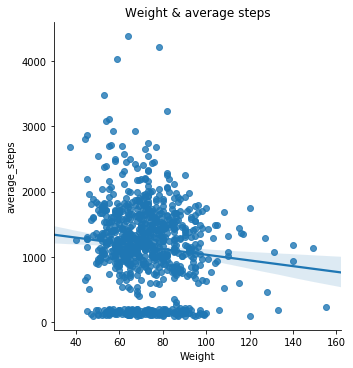

In [15]:
sns.lmplot(x='weight', y='average_steps_mean', fit_reg=True, data=df_sel) 
plt.xlabel('Weight') 
plt.ylabel('average_steps')
plt.title('Weight & average steps')
plt.show()

Seems that the less a person weighs, the more steps it makes. 

In [18]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df_sel['average_steps_mean'],df_sel['weight']))
print(pearsonr(df_sel['average_steps_mean'],df_sel['height']))

(-0.10117877662872041, 0.0029402511797835492)
(-0.015567388101892118, 0.6480876988926757)


The pearson correlation shows us that the correlation between weight and steps and height and steps are negligible.

In [40]:
pd.crosstab(df2["mean_steps"], df2["gender"])

gender,female,male
mean_steps,,
0.000000,90,65
26.000000,0,1
331.500000,0,1
626.500000,0,1
747.000000,1,0
...,...,...
18532.130435,0,1
20191.457516,1,0
23048.694969,1,0


In [25]:
pd.crosstab(df2["average_steps_mean"],df2["gender"], normalize="columns").describe()

gender,female,male
count,842.000000,842.000000
mean,0.001188,0.001188
std,0.001230,0.001162
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.002252
75%,0.002392,0.002252
max,0.004785,0.006757


A table to show the differences between man and woman. Including some graphs. 

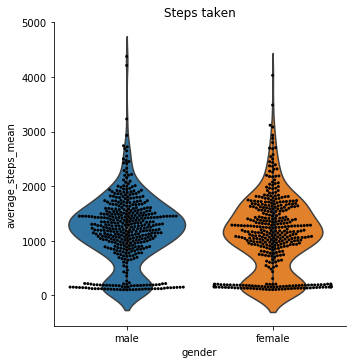

In [29]:
sns.catplot(x="gender", y="average_steps_mean", kind="violin", data=df2)#swarmplot steps per gender 
sns.swarmplot(x="gender", y="average_steps_mean", size=3, color="k", data=df2)
plt.title('Steps taken')
plt.show()

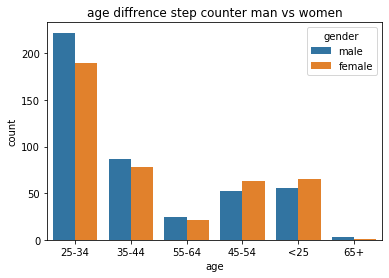

In [33]:
sns.countplot(x="age", hue="gender", data=df2)      #plot that shows the age and gender diffences from the paricipants    
plt.title('age diffrence step counter man vs women')
plt.show()

In [35]:
pd.crosstab(df2["age"],df2["gender"], normalize="columns") #cross table with the percentages between male and female

gender,female,male
age,,
25-34,0.454545,0.500000
35-44,0.186603,0.195946
45-54,0.150718,0.117117
55-64,0.050239,0.054054
65+,0.002392,0.006757
<25,0.155502,0.126126
